<a href="https://colab.research.google.com/github/Lenakirara/Bootcamp_de_Dados_MIA/blob/main/State_of_Data_Brazil_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State of Data Brazil 2021

O objetivo deste projeto prático é realizar a visualização dos dados com relação ao panorama do mercado de trabalho brasileiro na área de dados.

## Base de dados utilizada

- Kaggle: [State Of Data - 2021](https://www.kaggle.com/datasets/datahackers/state-of-data-2021)


## Importando as Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

## Buscando o Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIA/aula4/State_of_data_2021_pg01.csv')
df.head()

,Unnamed: 0,Idade,Genero,UF,Regiao_origem,Nivel Ensino,Area Formacao,Situacao Trabalho,Setor,Trabalha como Gestao,...,Cargo Atual,Nivel,Faixa Salarial,Insatisfacao com a Empresa,Tempo XP em Dados,Tempo XP em Software,Criterios de escolha trabalho,Forma de trabalho atual,Forma de trabalho desejada,Faixa Salarial_number
0,0,38.0,Masculino,CE,NaN,Pós-graduação,Química / Física,Empregado (CLT),Marketing,1.0,...,NaN,Gestor,de R$ 4.001/mês a R$ 6.000/mês,NaN,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,6000.0
1,1,39.0,Masculino,BA,Sudeste,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Consultoria,1.0,...,NaN,Gestor,de R$ 6.001/mês a R$ 8.000/mês,NaN,de 2 a 3 anos,Não tive experiência na área de TI/Engenharia ...,Flexibilidade de trabalho remoto,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,8000.0
2,2,30.0,Masculino,SC,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Indústria,1.0,...,NaN,Gestor,de R$ 8.001/mês a R$ 12.000/mês,O clima de trabalho/ambiente não é bom,de 1 a 2 anos,de 2 a 3 anos,Oportunidade de aprendizado e trabalhar com re...,Modelo 100% presencial,Modelo 100% remoto,12000.0
3,3,38.0,Feminino,SP,NaN,Pós-graduação,Outras,Empreendedor ou Empregado (CNPJ),Serviços,1.0,...,NaN,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Falta de maturidade analítica na empresa,Mais de 10 anos,Menos de 1 ano,"Propósito do trabalho e da empresa, Flexibilid...",Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,16000.0
4,4,36.0,Masculino,SC,NaN,Pós-graduação,Outras Engenharias,Empreendedor ou Empregado (CNPJ),Varejo,1.0,...,NaN,Gestor,de R$ 8.001/mês a R$ 12.000/mês,Gostaria de trabalhar em em outra área de atua...,de 1 a 2 anos,de 4 a 5 anos,Maturidade da empresa em termos de tecnologia ...,Modelo 100% presencial,Modelo 100% remoto,12000.0


In [4]:
df.columns

Index(['Unnamed: 0', 'Idade', 'Genero', 'UF', 'Regiao_origem', 'Nivel Ensino',
       'Area Formacao', 'Situacao Trabalho', 'Setor', 'Trabalha como Gestao',
       'Cargo como Gestor(a)', 'Cargo Atual', 'Nivel', 'Faixa Salarial',
       'Insatisfacao com a Empresa', 'Tempo XP em Dados',
       'Tempo XP em Software', 'Criterios de escolha trabalho',
       'Forma de trabalho atual', 'Forma de trabalho desejada',
       'Faixa Salarial_number'],
      dtype='object')

In [5]:
df.shape

(2365, 21)

## Análises gráficas iniciais

In [6]:
df.Genero.value_counts()

Masculino    1924
Feminino      436
Outro           5
Name: Genero, dtype: int64

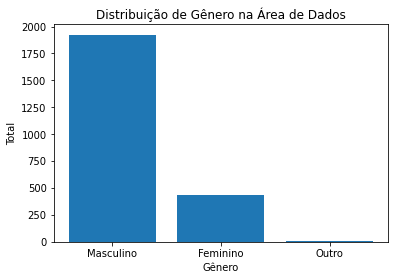

In [7]:
plt.bar(df.Genero.unique(), df.Genero.value_counts())
plt.title('Distribuição de Gênero na Área de Dados')
plt.xlabel('Gênero')
plt.ylabel('Total');

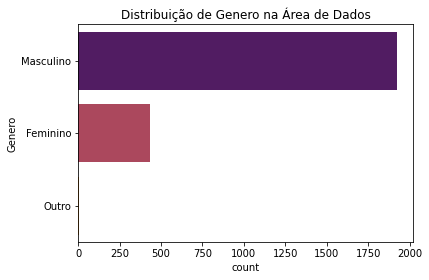

In [8]:
sns.countplot(y='Genero',
              data=df,
              palette='inferno',
              order=df['Genero'].value_counts().index) \
.set_title("Distribuição de Genero na Área de Dados");

## Verificando a distribuição de cargos

In [9]:
job_role = df.groupby('Genero')['Cargo Atual'].value_counts()
job_role.head()

Genero    Cargo Atual                                 
Feminino  Analista de Dados/Data Analyst                  83
          Cientista de Dados/Data Scientist               68
          Analista de BI/BI Analyst/Analytics Engineer    67
          Engenheiro de Dados/Data Engineer               40
          Analista de Negócios/Business Analyst           25
Name: Cargo Atual, dtype: int64

In [10]:
job_role = job_role.reset_index(name='Total')
sort_job_role = job_role.sort_values(by='Total', ascending=False)
sort_job_role.head(20)

,Genero,Cargo Atual,Total
19,Masculino,Cientista de Dados/Data Scientist,289
20,Masculino,Analista de BI/BI Analyst/Analytics Engineer,271
21,Masculino,Engenheiro de Dados/Data Engineer,259
22,Masculino,Analista de Dados/Data Analyst,241
23,Masculino,Outro,90
0,Feminino,Analista de Dados/Data Analyst,83
24,Masculino,Desenvolvedor ou Engenheiro de Software,77
25,Masculino,Analista de Negócios/Business Analyst,71
1,Feminino,Cientista de Dados/Data Scientist,68
2,Feminino,Analista de BI/BI Analyst/Analytics Engineer,67


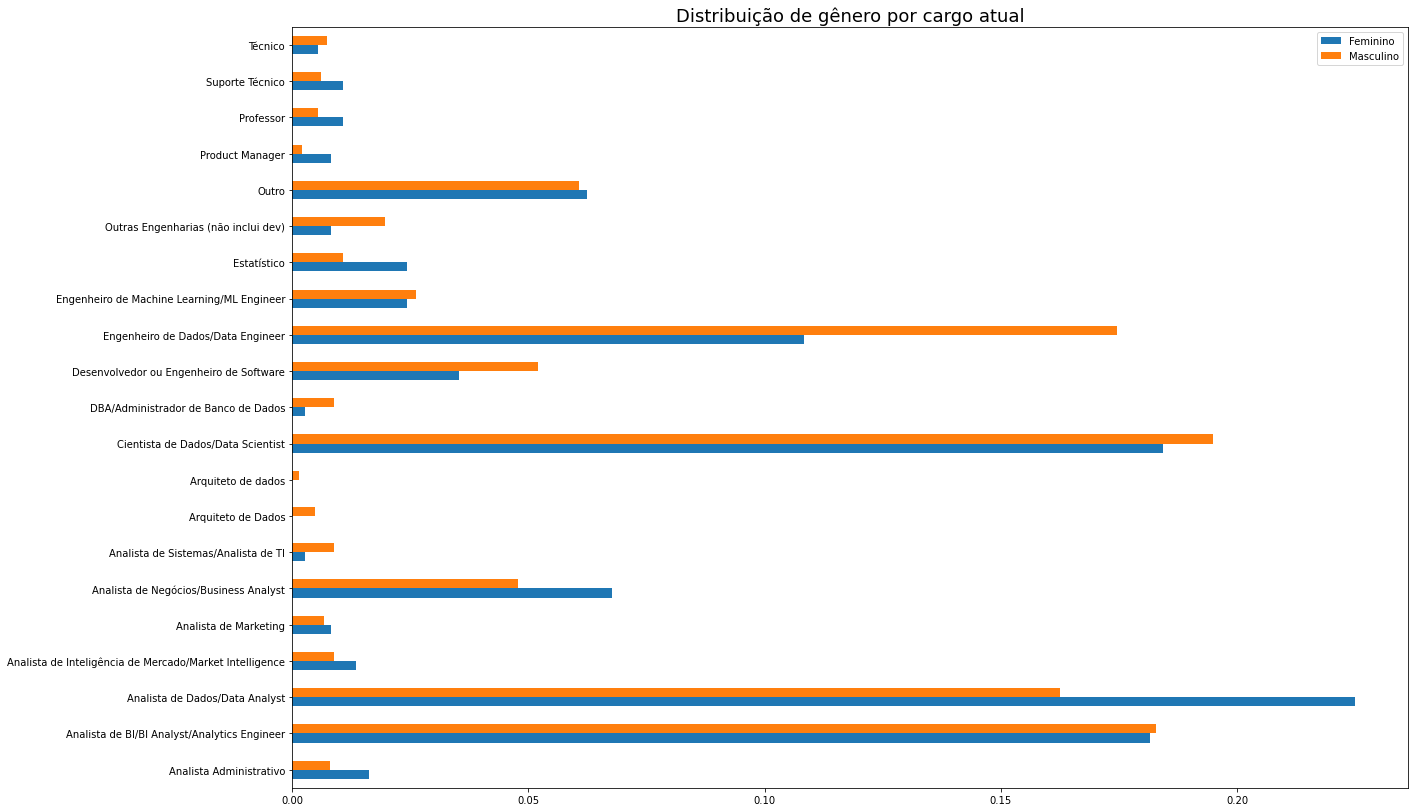

In [11]:
feminine = df.query("Genero == 'Feminino'")["Cargo Atual"].value_counts(normalize=True)
masculine = df.query("Genero == 'Masculino'")["Cargo Atual"].value_counts(normalize=True)

job_role_fig = pd.DataFrame({'Feminino': feminine,
                                'Masculino': masculine})
job_role_fig.plot.barh(figsize=(20,14))
plt.title('Distribuição de gênero por cargo atual', fontsize=18);

## Verificando a distribuição de nível por gênero

In [12]:
tmp = df.groupby('Genero')['Nivel'].value_counts()
tmp.head()

Genero     Nivel 
Feminino   Júnior    144
           Pleno     131
           Sênior     94
           Gestor     67
Masculino  Pleno     525
Name: Nivel, dtype: int64

In [13]:
tmp = tmp.reset_index(name='total')
tmp.head()

,Genero,Nivel,total
0,Feminino,Júnior,144
1,Feminino,Pleno,131
2,Feminino,Sênior,94
3,Feminino,Gestor,67
4,Masculino,Pleno,525


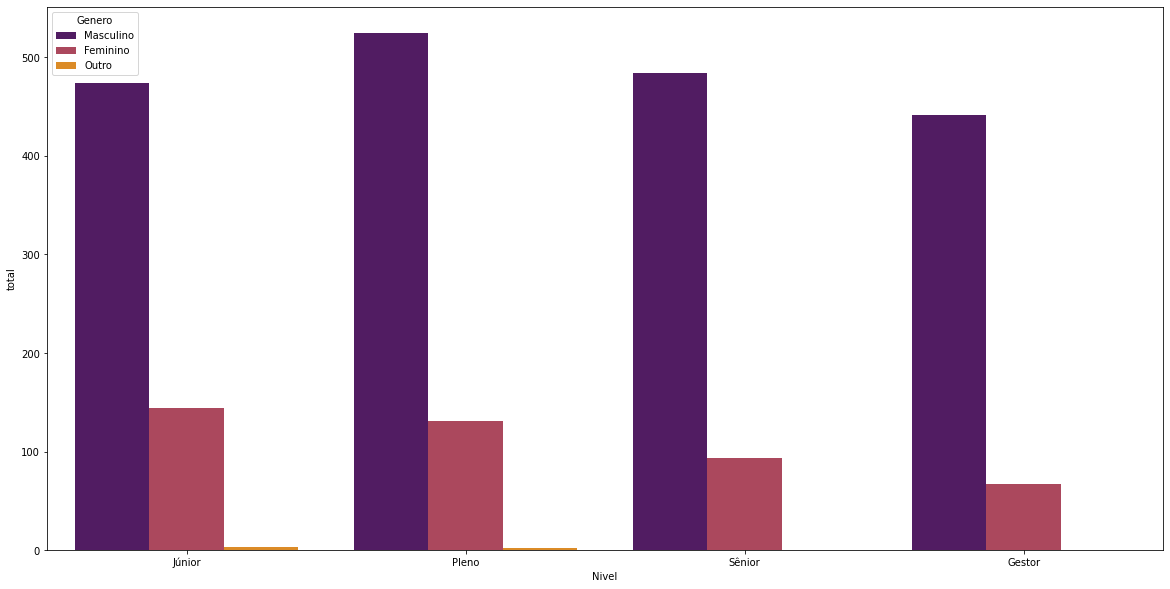

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel',
            y='total',
            hue='Genero',
            data=tmp,
            hue_order=['Masculino', 'Feminino', 'Outro'],
            palette='inferno');

## Analisando os salários

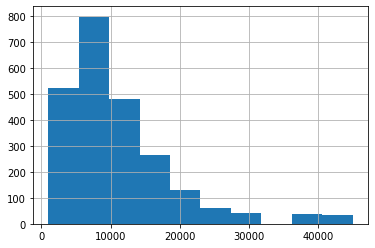

In [15]:
df['Faixa Salarial_number'].hist();

## Grafico de gênero vs salário

In [16]:
df2 = df[df['Cargo Atual'].str.contains('Cientista de Dados', na=False)]

In [17]:
tmp = df2.groupby(['Genero', 'Nivel'])['Faixa Salarial_number'].mean()

In [18]:
tmp.head()

Genero     Nivel 
Feminino   Júnior     5615.384615
           Pleno      9600.000000
           Sênior    13882.352941
Masculino  Júnior     5247.191011
           Pleno     10896.825397
Name: Faixa Salarial_number, dtype: float64

In [19]:
tmp = tmp.reset_index(name='Salario Medio')
tmp.head()

,Genero,Nivel,Salario Medio
0,Feminino,Júnior,5615.384615
1,Feminino,Pleno,9600.000000
2,Feminino,Sênior,13882.352941
3,Masculino,Júnior,5247.191011
4,Masculino,Pleno,10896.825397


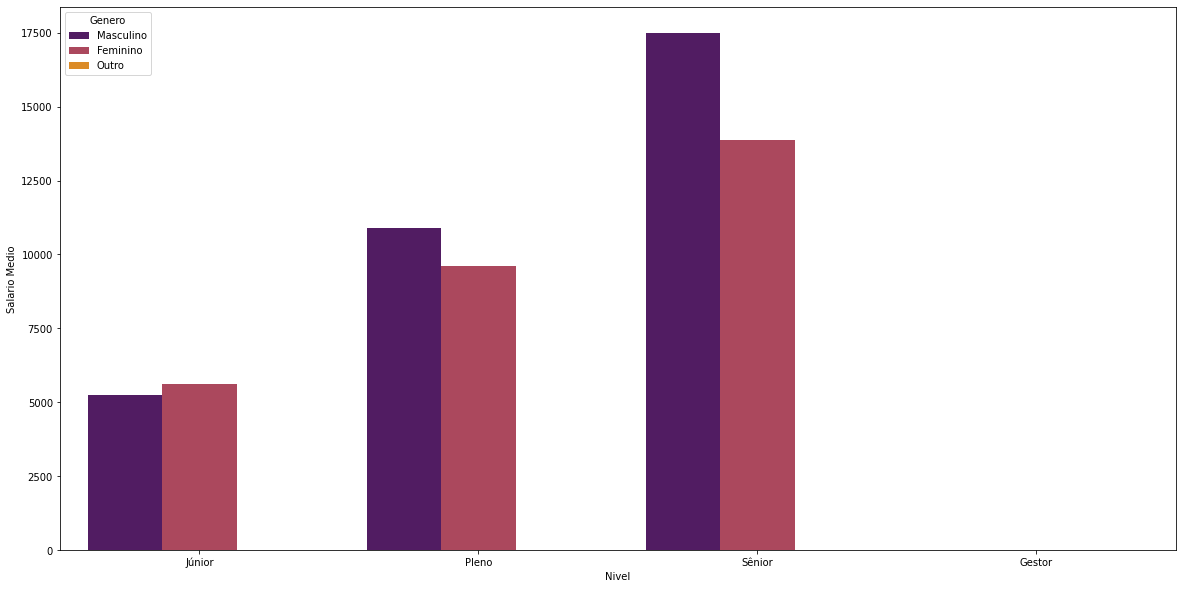

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel',
            y='Salario Medio',
            hue='Genero',
            data=tmp,
            order=['Júnior', 'Pleno', 'Sênior', 'Gestor'],
            palette='inferno',
            hue_order=['Masculino', 'Feminino', 'Outro']);

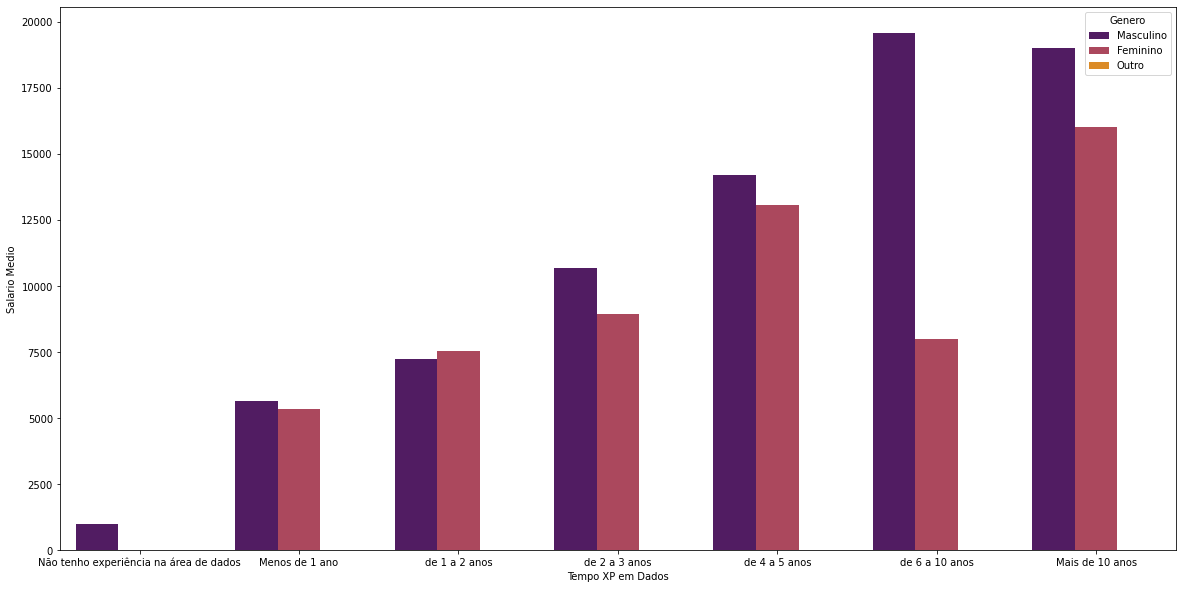

In [21]:
tmp = df2.groupby(['Genero', 'Tempo XP em Dados'])['Faixa Salarial_number'].mean()
tmp = tmp.reset_index(name='Salario Medio')
plt.figure(figsize=(20,10))
sns.barplot(x='Tempo XP em Dados',
            y='Salario Medio',
            hue='Genero',
            data=tmp,
            order=['Não tenho experiência na área de dados','Menos de 1 ano', 'de 1 a 2 anos',
       'de 2 a 3 anos', 'de 4 a 5 anos', 'de 6 a 10 anos', 'Mais de 10 anos'],
            hue_order=['Masculino', 'Feminino', 'Outro'],
            palette='inferno');

## Verificando a diferença de salário com relação a gestão

In [22]:
genre_manager = df.groupby(['Genero', 'Cargo como Gestor(a)'])['Faixa Salarial_number'].mean()

In [23]:
genre_manager = genre_manager.reset_index(name='Salario Medio')
genre_manager.head(10)

,Genero,Cargo como Gestor(a),Salario Medio
0,Feminino,Gerente/Head/Diretor/VP,20000.000000
1,Feminino,Supervisor/Coordenador,13300.000000
2,Feminino,"Sócio ou C-level (CEO, CDO, CIO, CTO etc)",19857.142857
3,Feminino,Team Leader/Tech Leader,9933.333333
4,Masculino,Gerente/Head/Diretor/VP,20947.368421
5,Masculino,Supervisor/Coordenador,12724.770642
6,Masculino,"Sócio ou C-level (CEO, CDO, CIO, CTO etc)",17390.625000
7,Masculino,Team Leader/Tech Leader,14917.525773


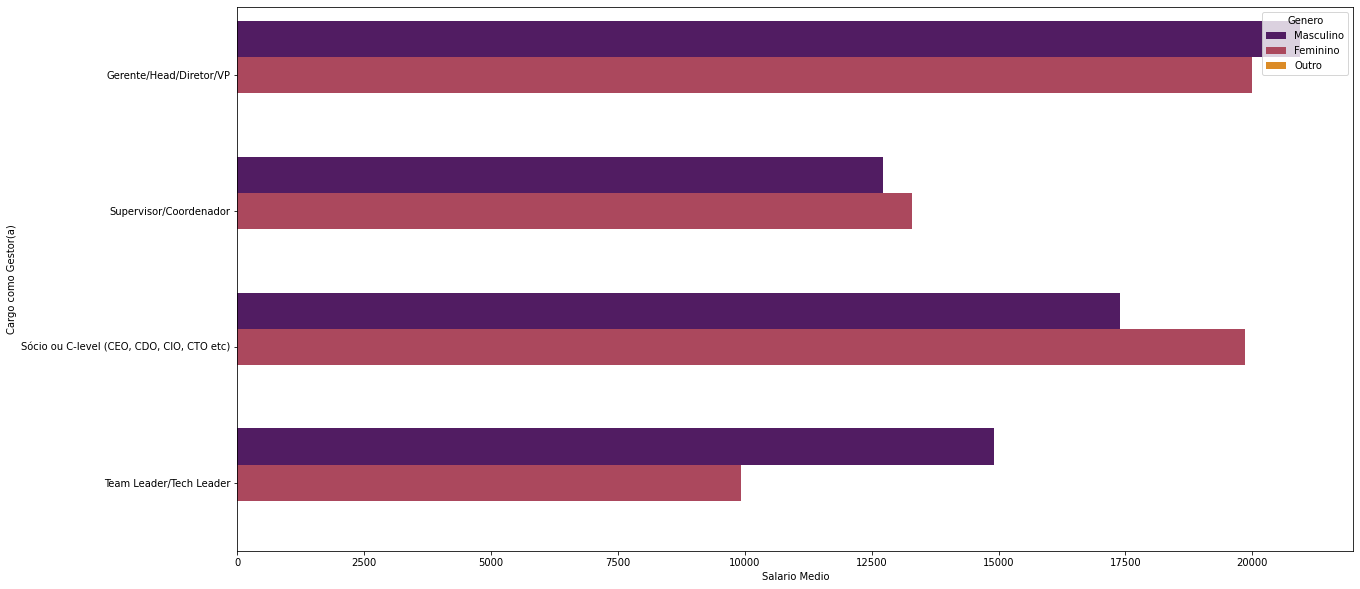

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(x='Salario Medio',
            y='Cargo como Gestor(a)',
            hue='Genero',
            data=genre_manager,
            palette='inferno',
            hue_order=['Masculino', 'Feminino', 'Outro']);

## Verificando a diferença dos gêneros por formação

In [25]:
genre_training_area = df.groupby(['Genero', 'Nivel Ensino'])['Area Formacao'].value_counts()
genre_training_area.head()

Genero    Nivel Ensino      Area Formacao                                                   
Feminino  Doutorado ou Phd  Computação / Engenharia de Software / Sistemas de Informação/ TI    6
                            Ciências Biológicas/Farmácia/Medicina/Área da Saúde                 5
                            Estatística/ Matemática / Matemática Computacional                  4
                            Outras Engenharias                                                  2
                            Química / Física                                                    1
Name: Area Formacao, dtype: int64

In [26]:
genre_training_area = genre_training_area.reset_index(name='total')
genre_training_area.head()

,Genero,Nivel Ensino,Area Formacao,total
0,Feminino,Doutorado ou Phd,Computação / Engenharia de Software / Sistemas...,6
1,Feminino,Doutorado ou Phd,Ciências Biológicas/Farmácia/Medicina/Área da ...,5
2,Feminino,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,4
3,Feminino,Doutorado ou Phd,Outras Engenharias,2
4,Feminino,Doutorado ou Phd,Química / Física,1


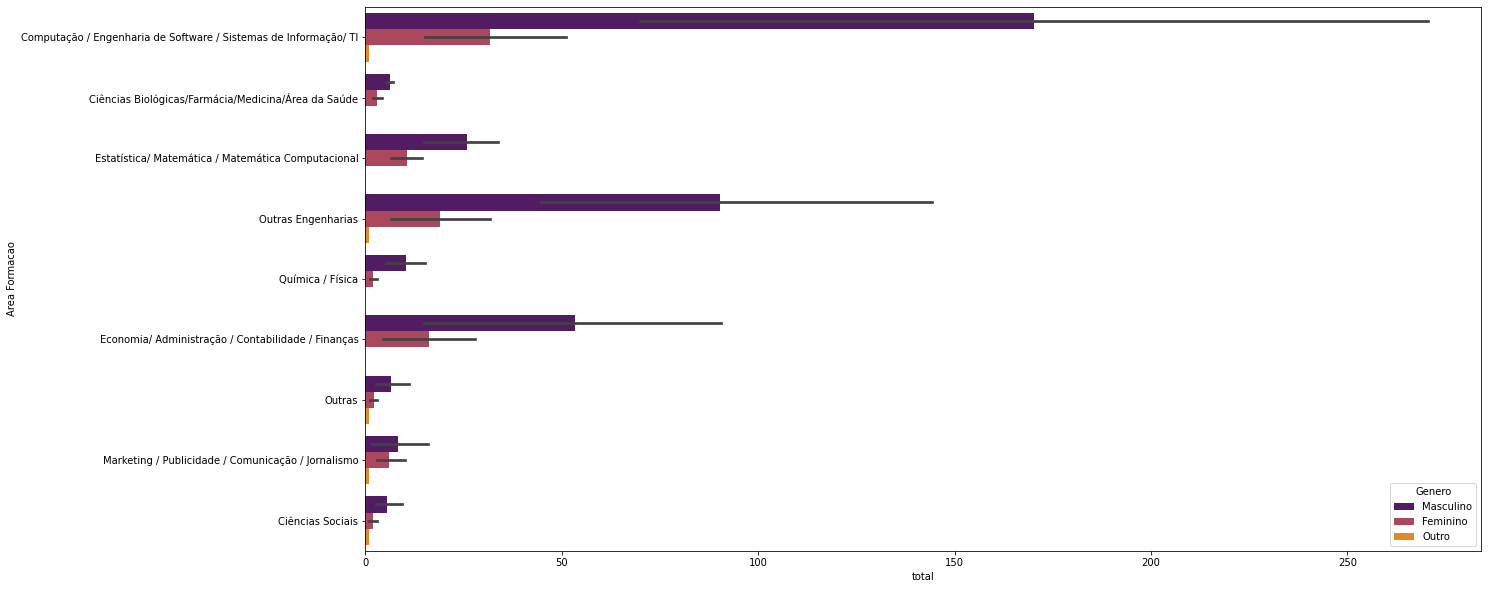

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(x='total',
            y='Area Formacao',
            hue='Genero',
            data=genre_training_area,
            hue_order=['Masculino', 'Feminino', 'Outro'],
            palette='inferno');